In [65]:
from rdkit import Chem
from tqdm import tqdm
from pqdm.processes import pqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from ogb.lsc import PCQM4Mv2Dataset
from ogb.utils import smiles2graph


In [3]:
dataset = PCQM4Mv2Dataset(root = '/cpmp/pcqm4mv2', only_smiles = True)


In [4]:
split_dict = dataset.get_idx_split()
split_dict

{'train': array([      0,       1,       2, ..., 3378603, 3378604, 3378605]),
 'valid': array([3378606, 3378607, 3378613, ..., 3746602, 3746611, 3746612]),
 'test-dev': array([3378608, 3378609, 3378610, ..., 3746617, 3746618, 3746619]),
 'test-challenge': array([3378615, 3378616, 3378620, ..., 3746614, 3746615, 3746616])}

In [5]:
for k,v in split_dict.items():
    print(k, len(v))

train 3378606
valid 73545
test-dev 147037
test-challenge 147432


In [6]:
res = [(smiles2graph(mol[0]),mol[1]) for mol in tqdm(dataset)]

 44%|████▍     | 1652196/3746620 [20:02<22:46, 1532.52it/s] [22:01:48] WARNING: not removing hydrogen atom without neighbors
[22:01:48] WARNING: not removing hydrogen atom without neighbors
[22:01:48] WARNING: not removing hydrogen atom without neighbors
 47%|████▋     | 1761785/3746620 [21:16<22:55, 1443.29it/s] [22:03:01] WARNING: not removing hydrogen atom without neighbors
[22:03:01] WARNING: not removing hydrogen atom without neighbors
 51%|█████     | 1894106/3746620 [22:44<19:37, 1573.79it/s][22:04:29] WARNING: not removing hydrogen atom without neighbors
[22:04:29] WARNING: not removing hydrogen atom without neighbors
[22:04:29] WARNING: not removing hydrogen atom without neighbors
 51%|█████▏    | 1921314/3746620 [23:01<19:15, 1579.80it/s][22:04:47] Conflicting single bond directions around double bond at index 13.
[22:04:47]   BondStereo set to STEREONONE and single bond directions set to NONE.
 55%|█████▍    | 2046319/3746620 [24:29<18:28, 1533.38it/s][22:06:14] Conflicting 

In [7]:
import pickle as pkl
with open('/raid/pcqm4mv2/data.pkl', 'wb') as file:
    pkl.dump(res, file)

In [8]:
res[0]

({'edge_index': array([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
           8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16,
          14, 17, 10,  1, 16, 11,  8,  3],
         [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,
           9,  8, 10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15,
          17, 14,  1, 10, 11, 16,  3,  8]]),
  'edge_feat': array([[1, 0, 1],
         [1, 0, 1],
         [0, 0, 1],
         [0, 0, 1],
         [0, 0, 1],
         [0, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         [3, 0, 1],
         

In [33]:
df = pd.DataFrame({'num_nodes' : [r[0]['num_nodes'] for r in res],
                   'num_edges' : [len(r[0]['edge_feat']) / 2 for r in res],
                   'target' : [r[1] for r in res],
                  })

In [13]:
plt.rcParams['figure.figsize'] = (15, 5)

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_nodes,3746620.0,14.138250,2.607957,1.000000,13.000000,15.000000,16.000000,51.000000
num_edges,3746620.0,14.558939,3.074487,0.000000,13.000000,15.000000,17.000000,59.000000
target,3452151.0,5.684253,1.164615,0.375517,4.903492,5.578334,6.367464,47.023995


In [36]:
df_train = df.iloc[split_dict['train']]
df_valid = df.iloc[split_dict['valid']]
df_test_dev = df.iloc[split_dict['test-dev']]
df_test_challenge = df.iloc[split_dict['test-challenge']]

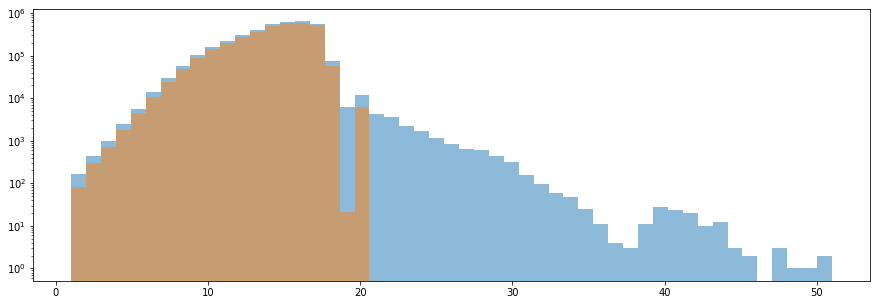

In [25]:
bins = np.linspace(1, 51, 52)
_ = plt.hist(df['num_nodes'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_train['num_nodes'], bins=bins, log=True, alpha=0.5)

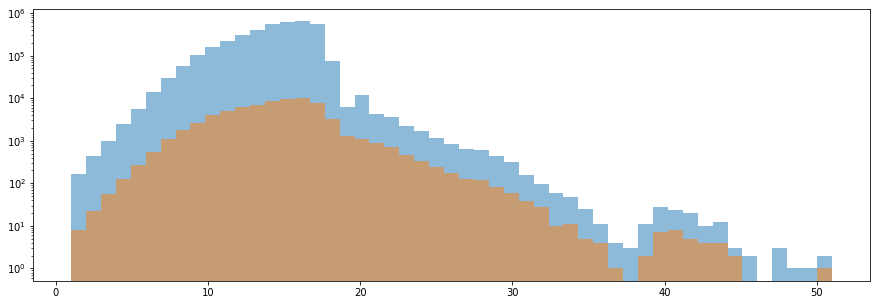

In [26]:
bins = np.linspace(1, 51, 52)
_ = plt.hist(df['num_nodes'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_valid['num_nodes'], bins=bins, log=True, alpha=0.5)

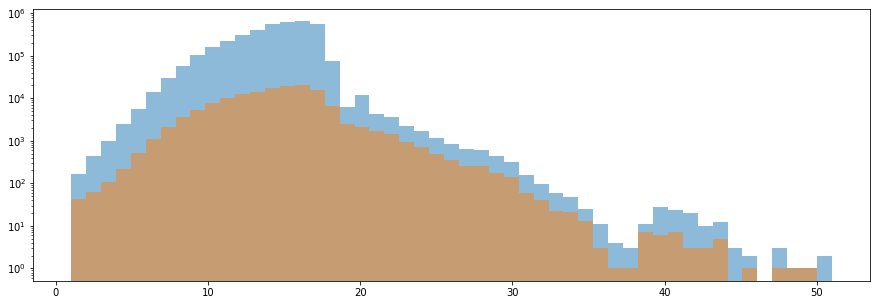

In [27]:
bins = np.linspace(1, 51, 52)
_ = plt.hist(df['num_nodes'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_test_dev['num_nodes'], bins=bins, log=True, alpha=0.5)

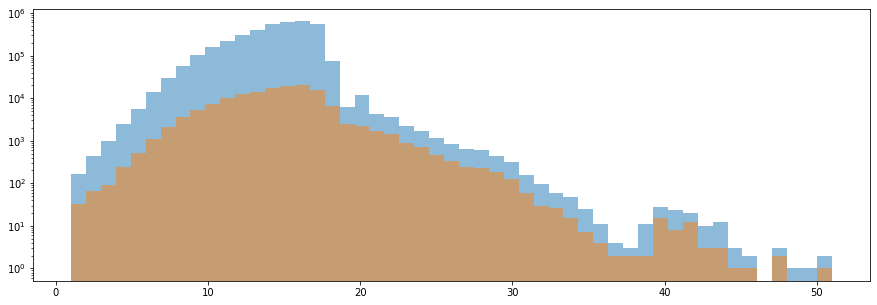

In [28]:
bins = np.linspace(1, 51, 52)
_ = plt.hist(df['num_nodes'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_test_challenge['num_nodes'], bins=bins, log=True, alpha=0.5)

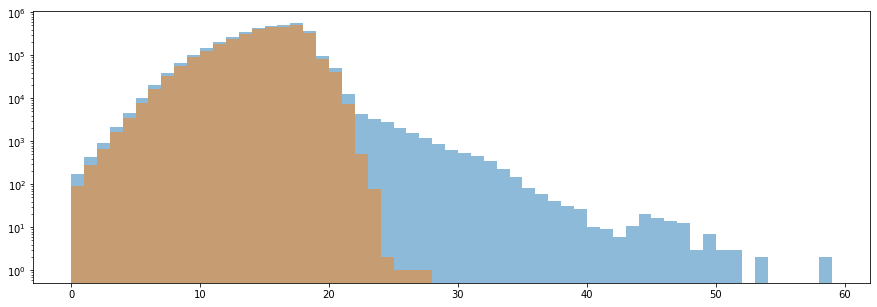

In [37]:
bins = np.linspace(0, 59, 60)
_ = plt.hist(df['num_edges'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_train['num_edges'], bins=bins, log=True, alpha=0.5)

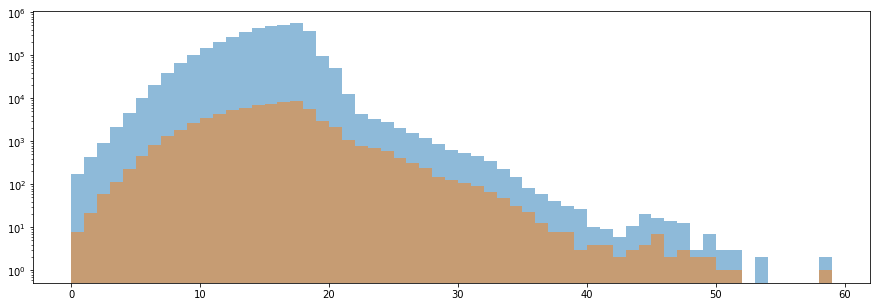

In [38]:
bins = np.linspace(0, 59, 60)
_ = plt.hist(df['num_edges'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_valid['num_edges'], bins=bins, log=True, alpha=0.5)

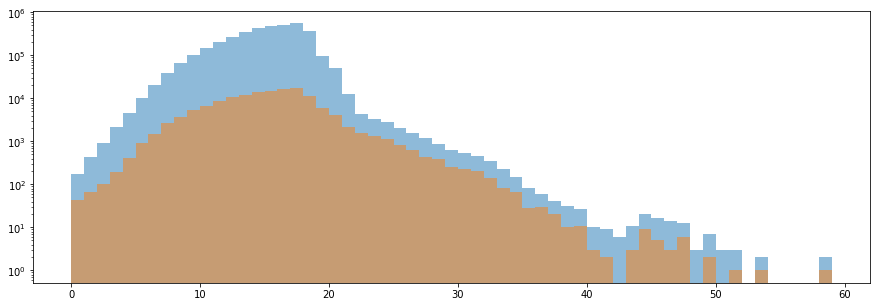

In [39]:
bins = np.linspace(0, 59, 60)
_ = plt.hist(df['num_edges'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_test_dev['num_edges'], bins=bins, log=True, alpha=0.5)

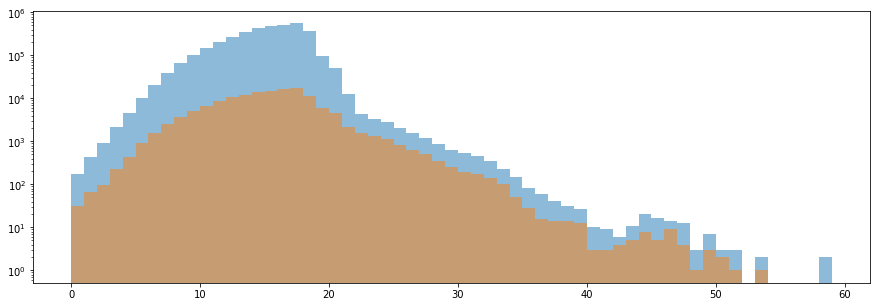

In [40]:
bins = np.linspace(0, 59, 60)
_ = plt.hist(df['num_edges'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_test_challenge['num_edges'], bins=bins, log=True, alpha=0.5)

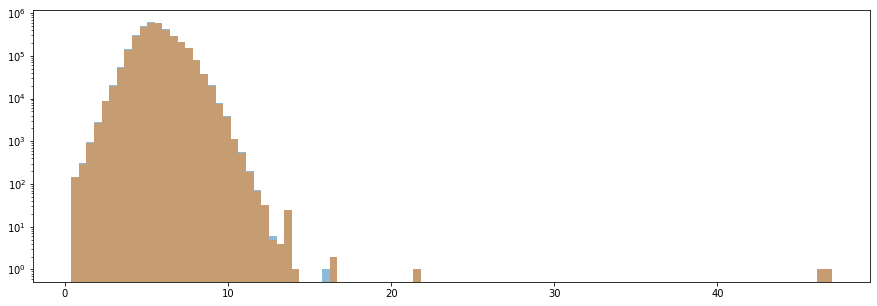

In [41]:
bins = 100
_ = plt.hist(df['target'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_train['target'], bins=bins, log=True, alpha=0.5)

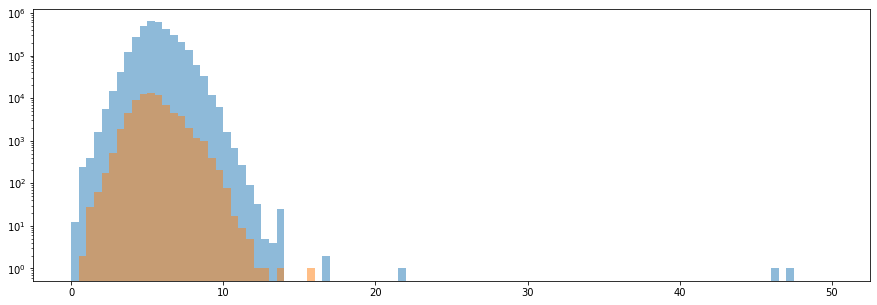

In [46]:
bins = np.linspace(0, 50, 101)
_ = plt.hist(df_train['target'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_valid['target'], bins=bins, log=True, alpha=0.5)

In [47]:
plt.rcParams['figure.figsize'] = (15, 15)

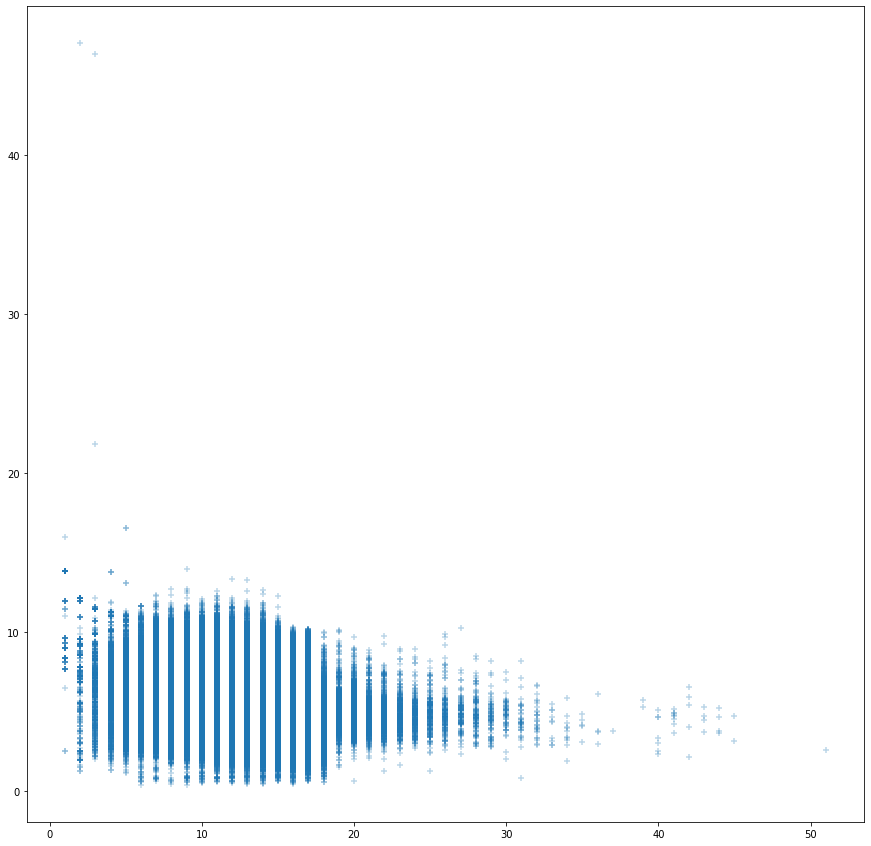

In [49]:
plt.scatter(df['num_nodes'], df['target'], marker='+', alpha=0.3)

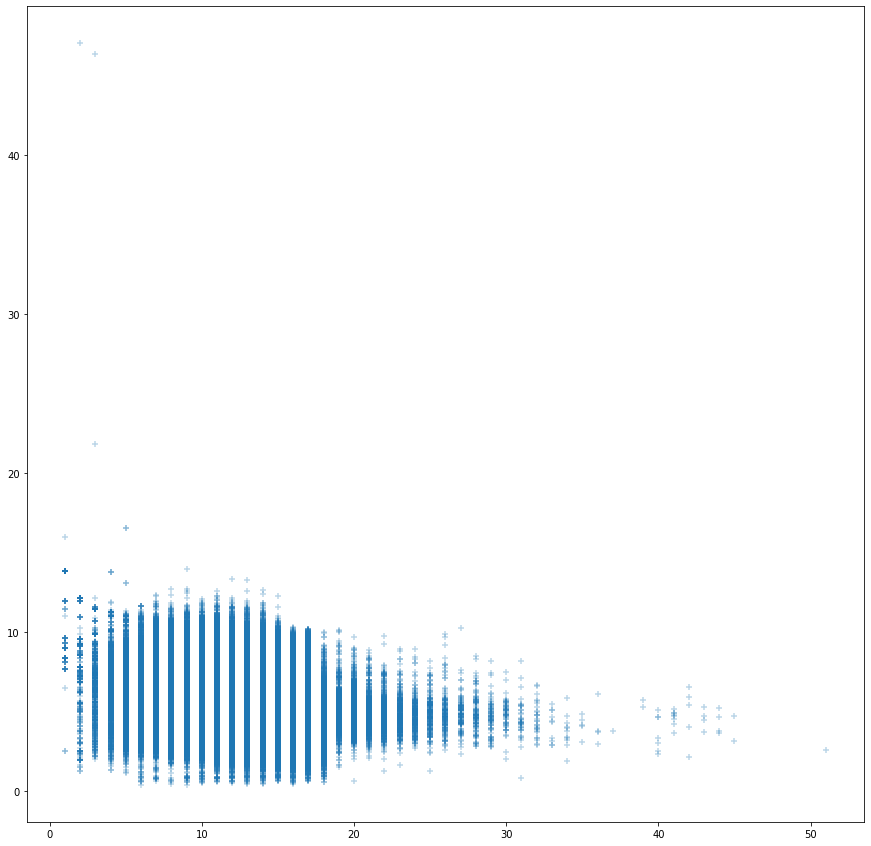

In [49]:
plt.scatter(df['num_nodes'], df['target'], marker='+', alpha=0.3)

<AxesSubplot:xlabel='num_nodes'>

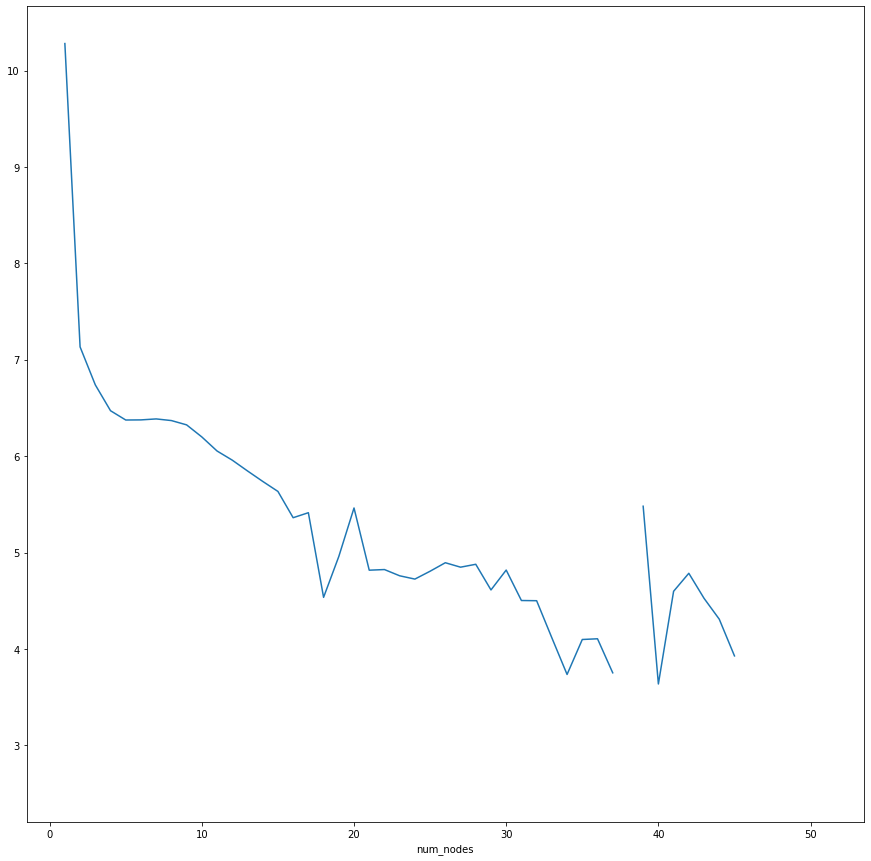

In [53]:
df.groupby('num_nodes').target.mean().plot()

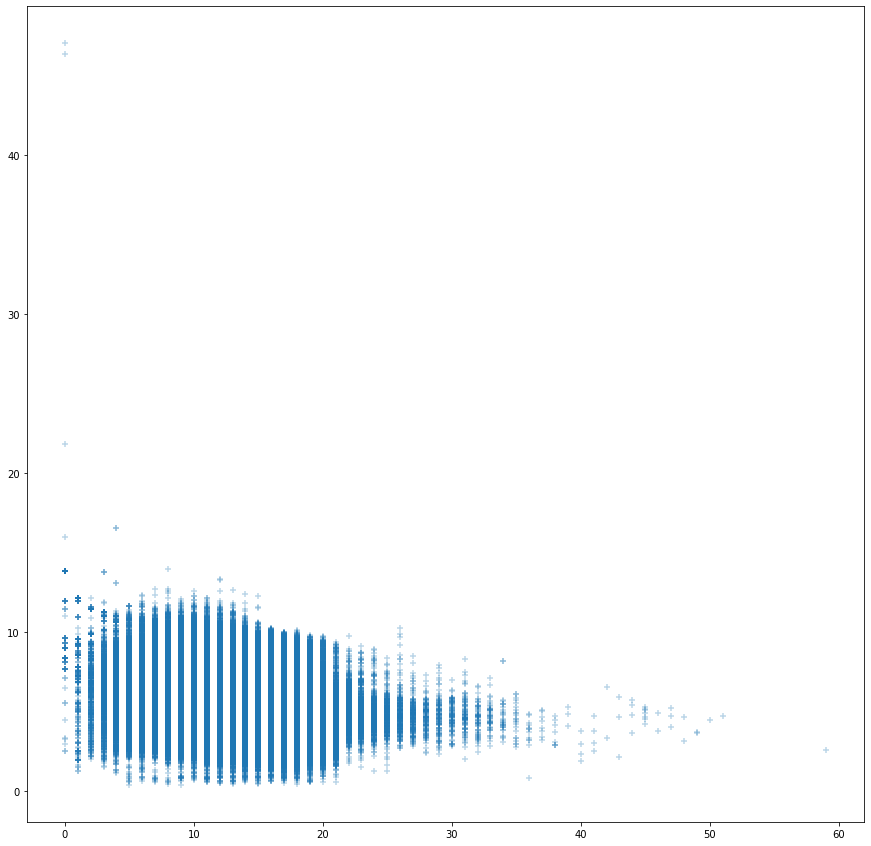

In [54]:
plt.scatter(df['num_edges'], df['target'], marker='+', alpha=0.3)

<AxesSubplot:xlabel='num_edges'>

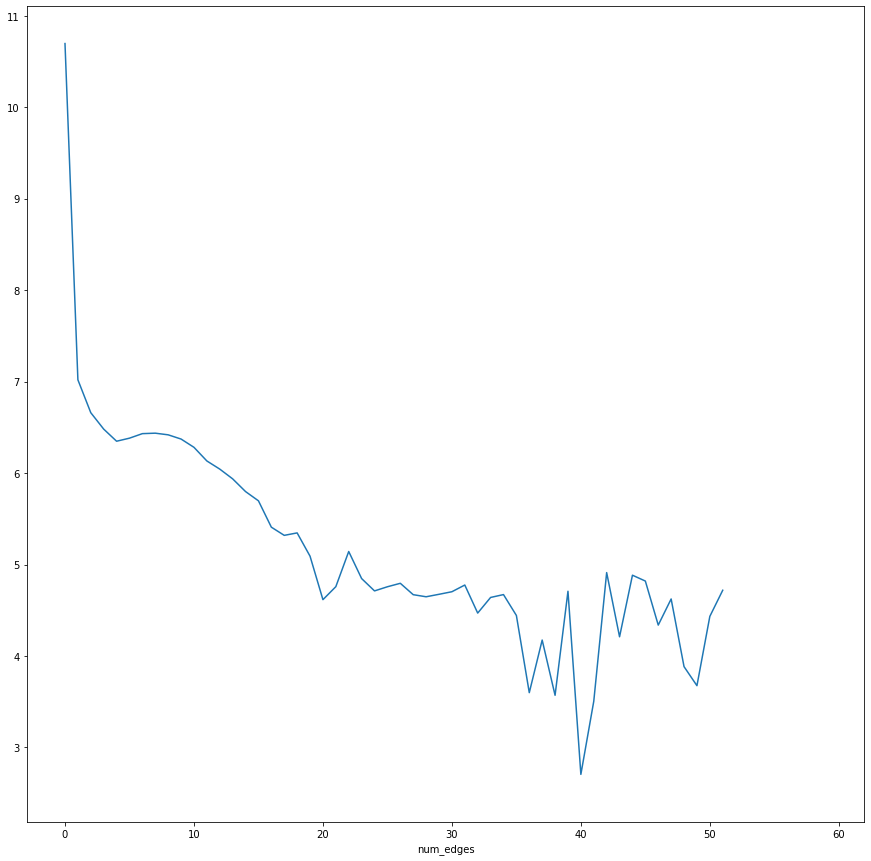

In [55]:
df.groupby('num_edges').target.mean().plot()

In [ ]:
df['num_nodes_edges'] = df['num_nodes'] + df['num_edges']
df.groupby('num_nodes_edges').target.mean().plot()

num_nodes  num_edges
1          0.0          10.279626
2          0.0           9.579617
           1.0           7.061168
3          0.0          34.106750
           1.0           3.252668
                          ...    
48         53.0               NaN
49         47.0               NaN
50         58.0               NaN
51         50.0               NaN
           59.0          2.590524
Name: target, Length: 340, dtype: float64

In [78]:
sns.set(rc={'figure.figsize':(12, 10)})

<AxesSubplot:xlabel='num_edges', ylabel='num_nodes'>

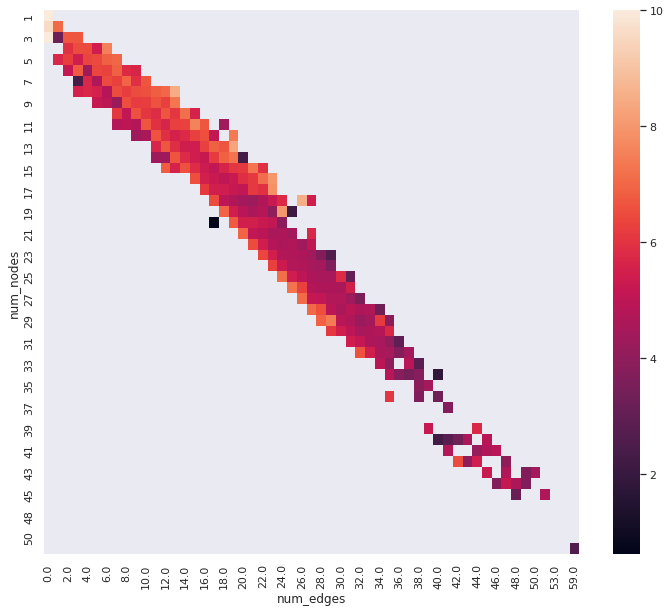

In [79]:
df0 = df.groupby(['num_nodes', 'num_edges'])['target'].mean()
mat = df0.unstack()
sns.heatmap(mat, vmax=10)

In [92]:
df0 = np.log(df.groupby(['num_nodes', 'num_edges'])['target'].count())
df0.describe()

/opt/conda/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    340.000000
mean           -inf
std             NaN
min            -inf
25%        0.000000
50%        2.197225
75%        4.749243
max       12.671594
Name: target, dtype: float64

<AxesSubplot:xlabel='num_edges', ylabel='num_nodes'>

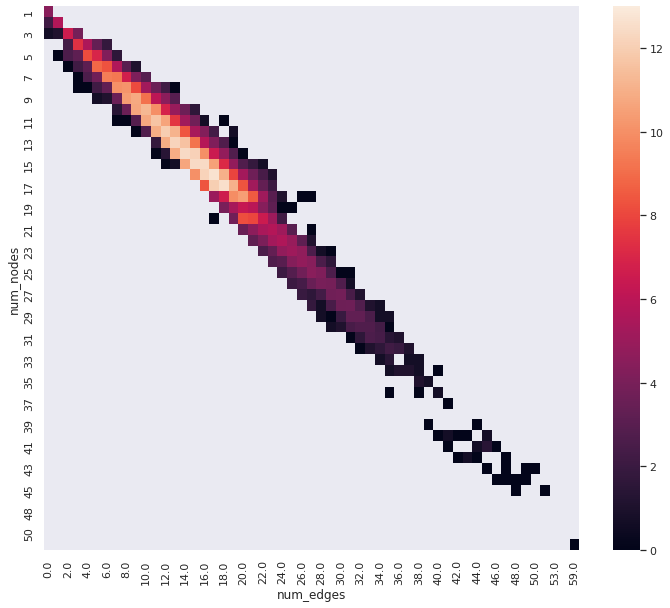

In [93]:
mat = df0.unstack()
sns.heatmap(mat, vmin=0, vmax=13)

In [105]:
len(df_train) + len(df_valid) + len(df_test_dev) + len(df_test_challenge)

3746620

In [106]:
len(dataset)

3746620

In [107]:
len(df_train)/len(dataset), len(df_valid)/len(dataset), len(df_test_dev)/len(dataset), len(df_test_challenge)/len(dataset),

(0.9017743993252585,
 0.01962969289653074,
 0.0392452397093914,
 0.039350668068819365)

In [110]:
90 / 4

22.5

In [120]:
(len(df_train) + len(df_valid)) / len(df_test_dev)

23.478110951665226

In [113]:
from sklearn.model_selection import KFold 

In [130]:
df

,num_nodes,num_edges,target,edge_density
0,18,20.0,3.047675,1.111111
1,17,17.0,4.410966,1.000000
2,16,16.0,4.639541,1.000000
3,16,16.0,4.492600,1.000000
4,16,16.0,4.612330,1.000000
...,...,...,...,...
3746615,12,13.0,NaN,1.083333
3746616,13,13.0,NaN,1.000000
3746617,10,9.0,NaN,0.900000
3746618,5,4.0,NaN,0.800000


In [131]:
df['mol_idx'] = df.index

df_train = df.iloc[split_dict['train']]
df_valid = df.iloc[split_dict['valid']]
df_test_dev = df.iloc[split_dict['test-dev']]
df_test_challenge = df.iloc[split_dict['test-challenge']]

In [132]:
df_train_valid = pd.concat([df_train, df_valid]).sample(frac=1).reset_index(drop=True)
df_train_valid 

,num_nodes,num_edges,target,edge_density,mol_idx
0,11,11.0,6.857269,1.000000,48009
1,9,9.0,2.070786,1.000000,34743
2,11,11.0,5.940245,1.000000,2787622
3,16,16.0,6.966115,1.000000,155029
4,16,17.0,5.616430,1.062500,614146
...,...,...,...,...,...
3452146,16,16.0,5.951130,1.000000,483296
3452147,15,17.0,3.934766,1.133333,435502
3452148,17,18.0,5.842284,1.058824,2023501
3452149,17,18.0,5.077644,1.058824,1587456


In [134]:
df_train_valid.mol_idx.value_counts().max()

1

In [135]:
kf = KFold(24)
train_folds = list(kf.split(df_train_valid))

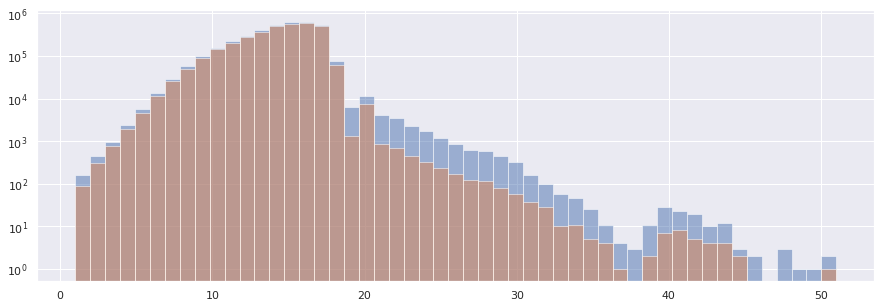

In [136]:
_ = plt.hist(df['num_nodes'], bins=bins, log=True, alpha=0.5)
_ = plt.hist(df_train_valid['num_nodes'], bins=bins, log=True, alpha=0.5)
plt.show()

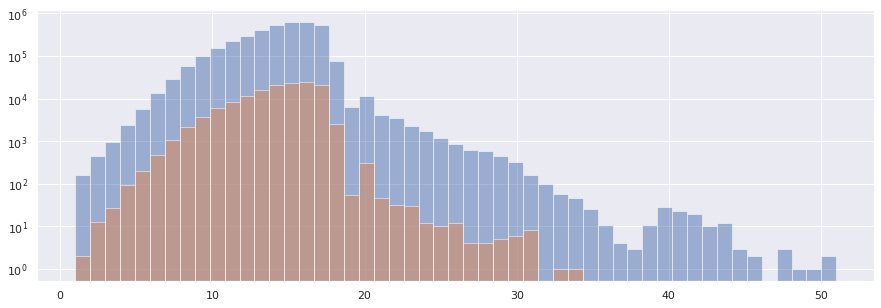

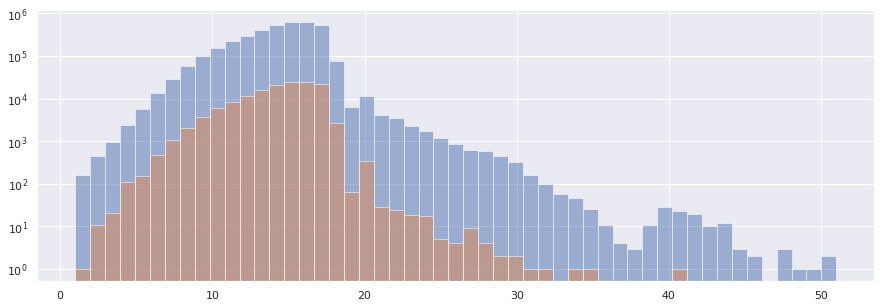

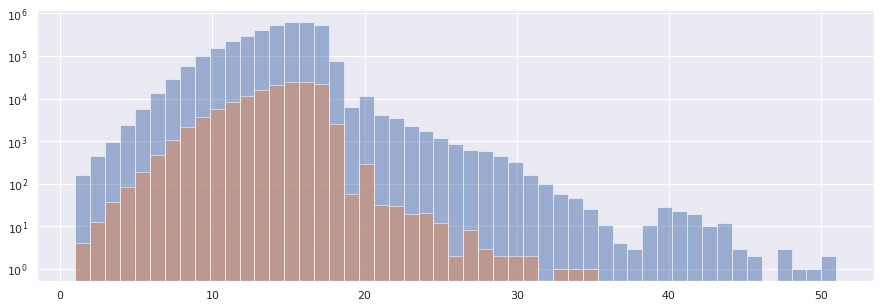

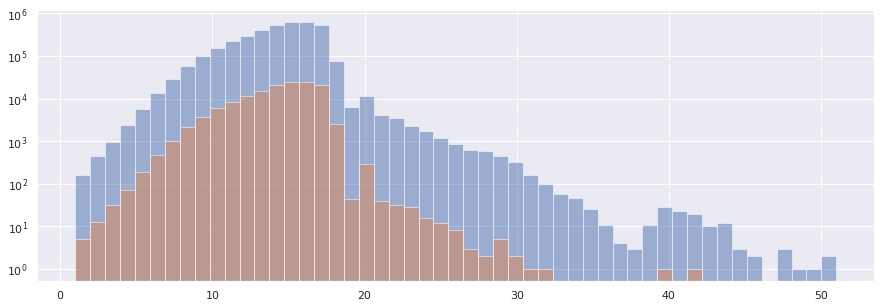

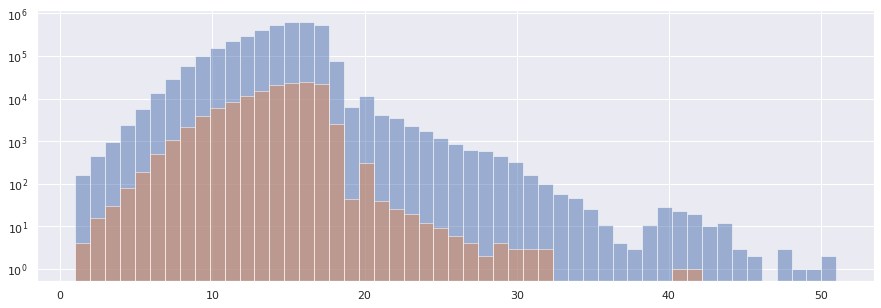

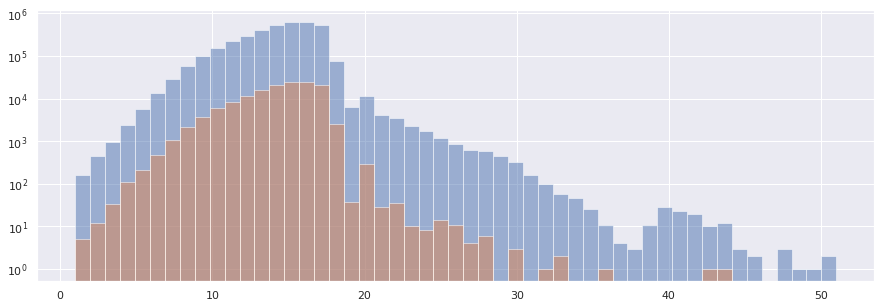

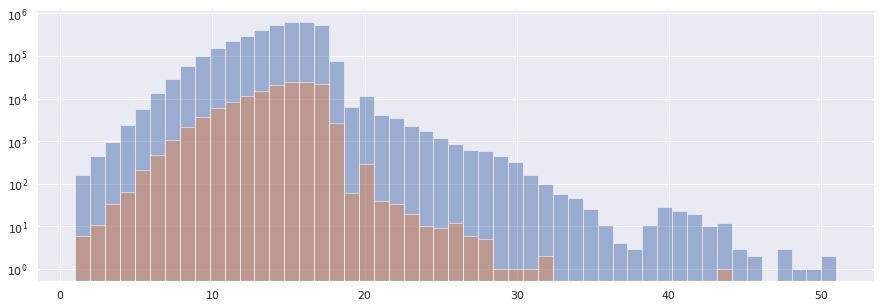

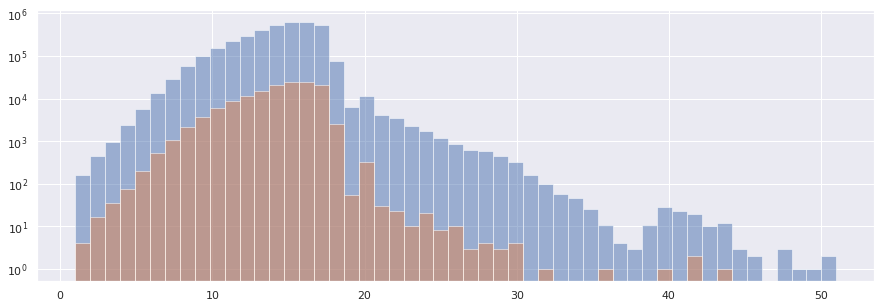

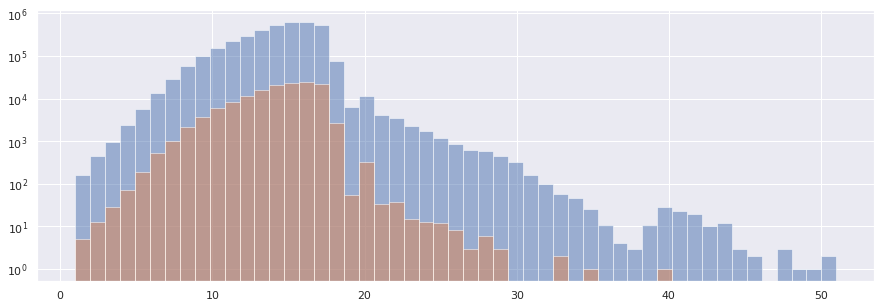

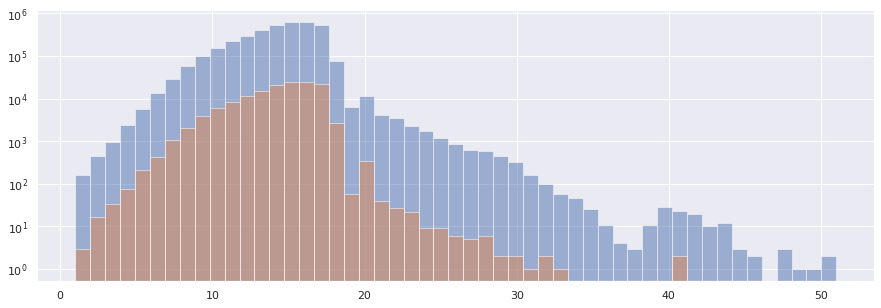

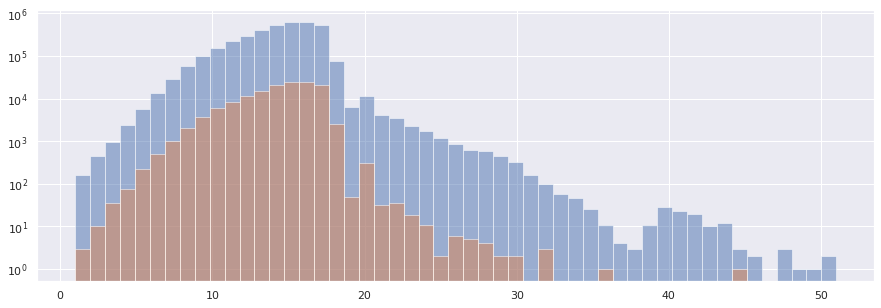

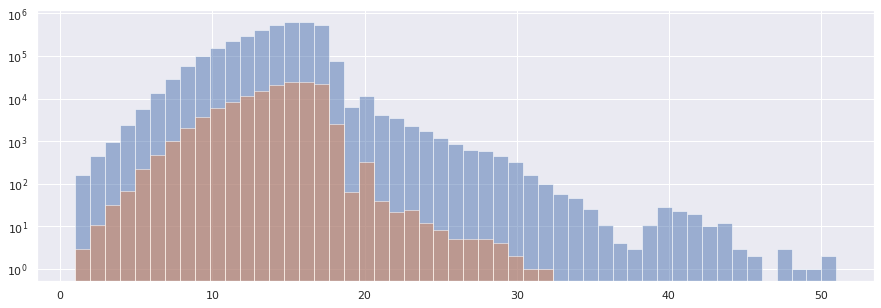

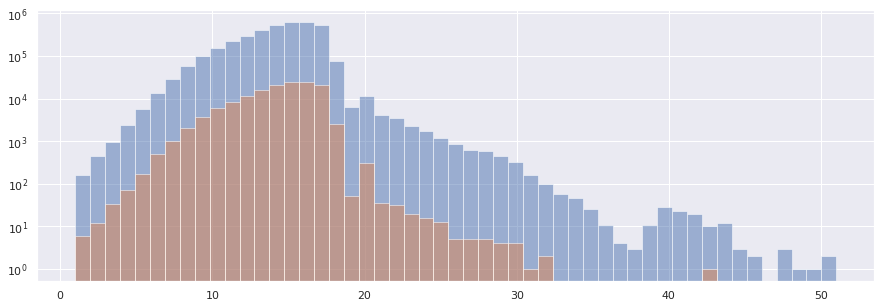

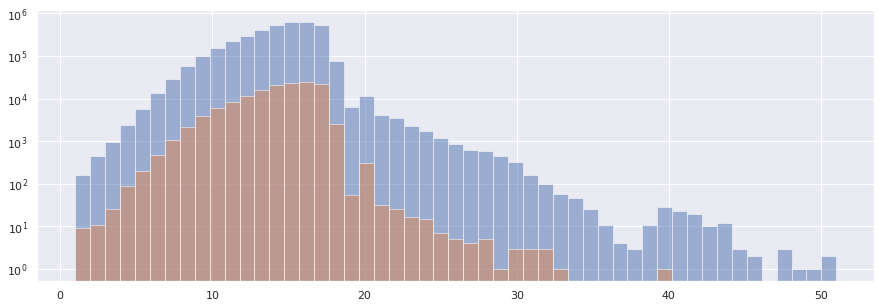

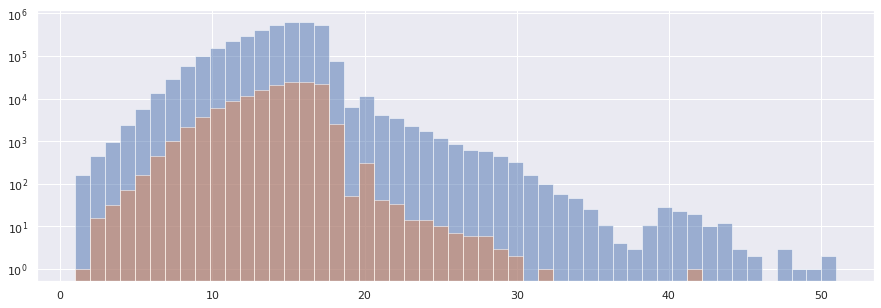

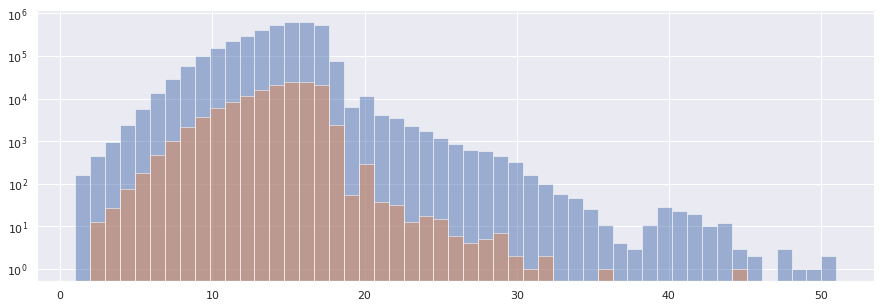

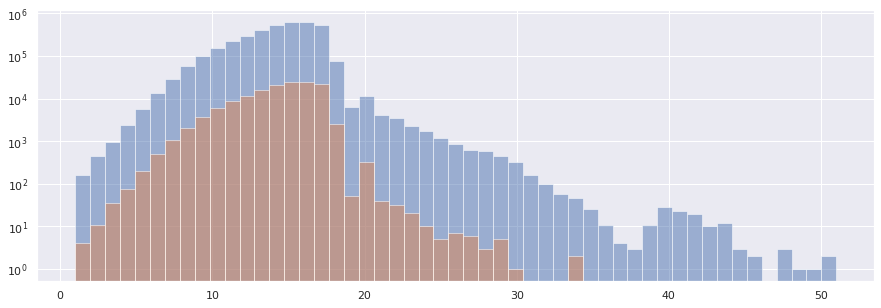

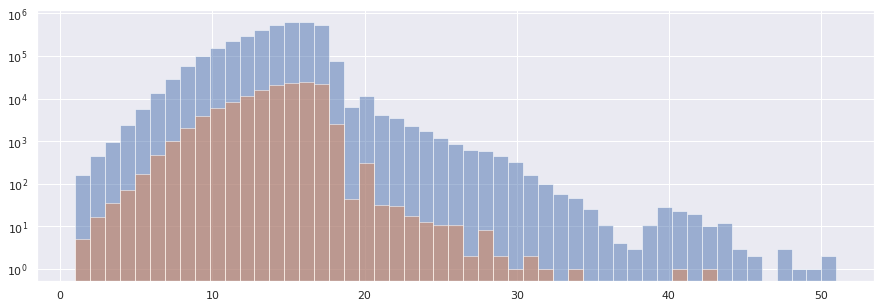

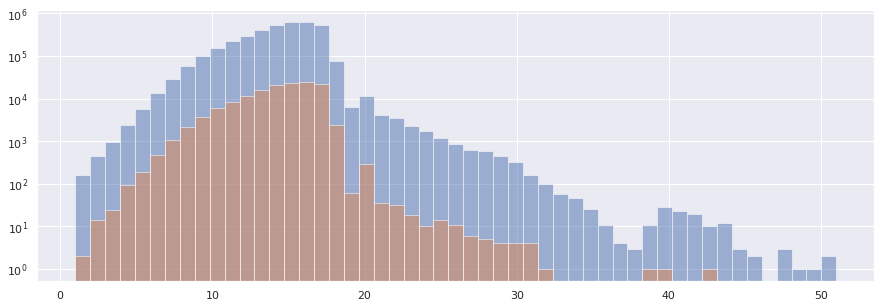

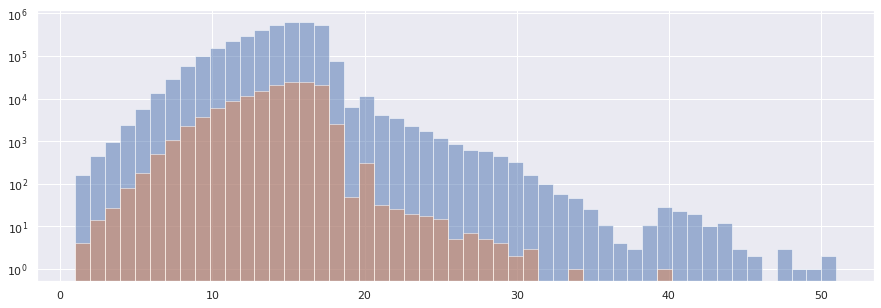

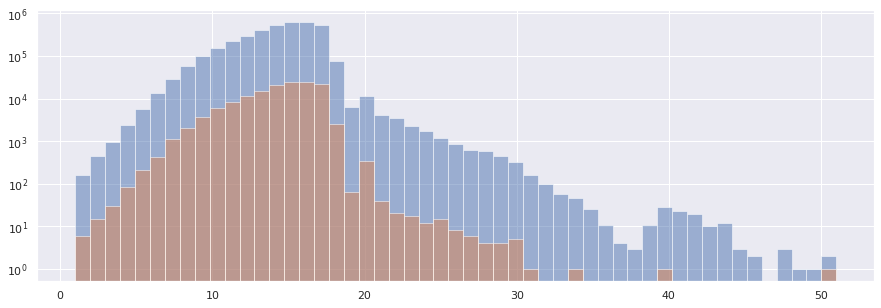

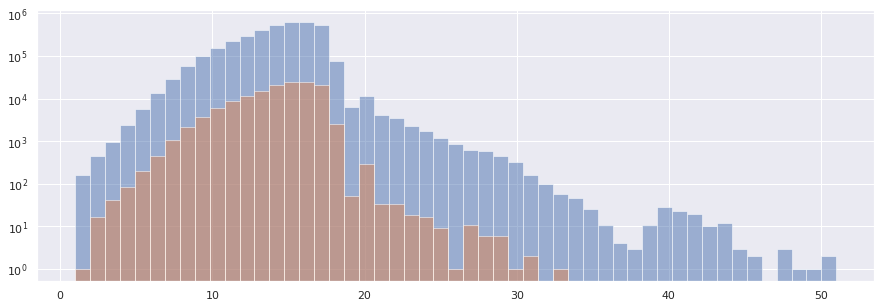

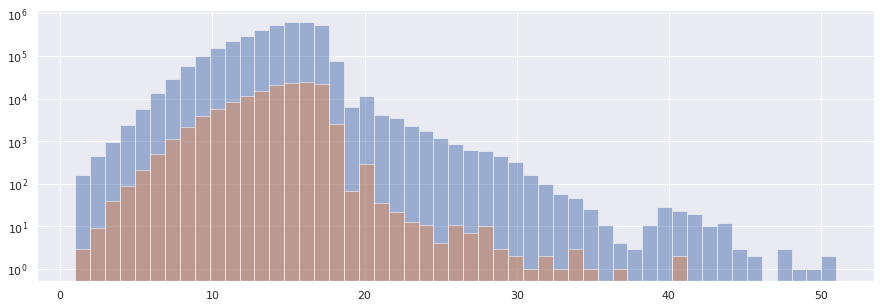

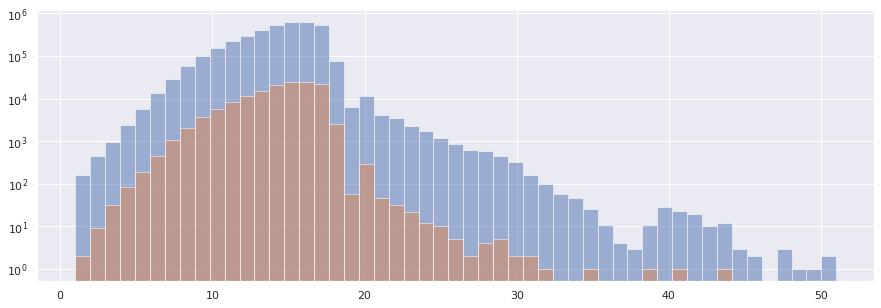

In [137]:
sns.set(rc={'figure.figsize':(15, 5)})
bins = np.linspace(1, 51, 52)
for train_idx, valid_idx in train_folds:
    _ = plt.hist(df['num_nodes'], bins=bins, log=True, alpha=0.5)
    _ = plt.hist(df_train_valid.iloc[valid_idx]['num_nodes'], bins=bins, log=True, alpha=0.5)
    plt.show()

In [138]:
new_folds = [(df_train_valid.loc[train_idx, 'mol_idx'].values,
              df_train_valid.loc[valid_idx, 'mol_idx'].values,
             ) for (train_idx, valid_idx) in train_folds]

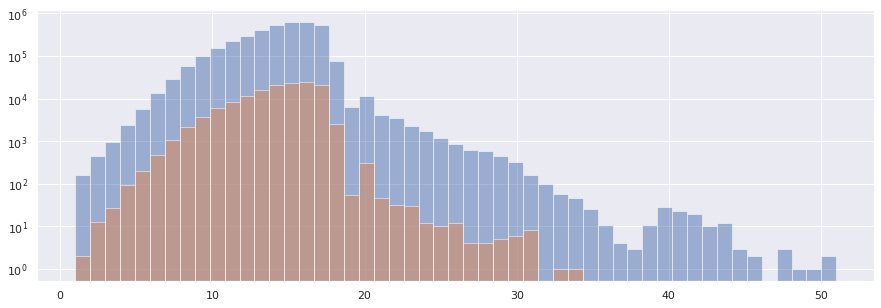

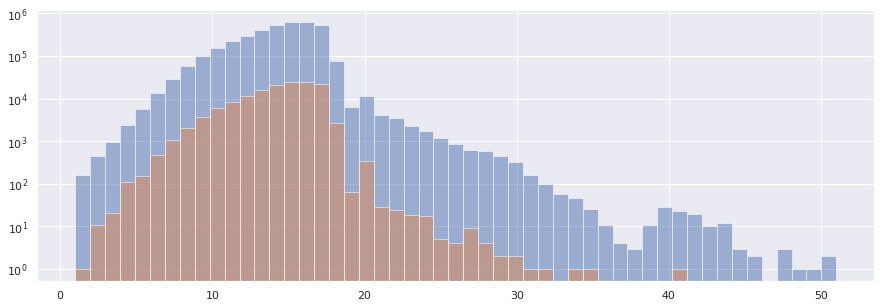

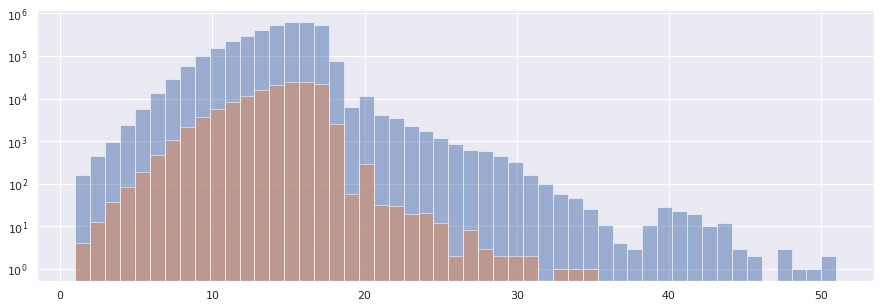

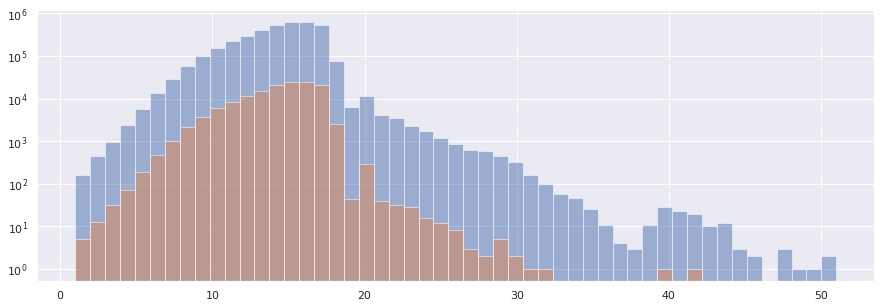

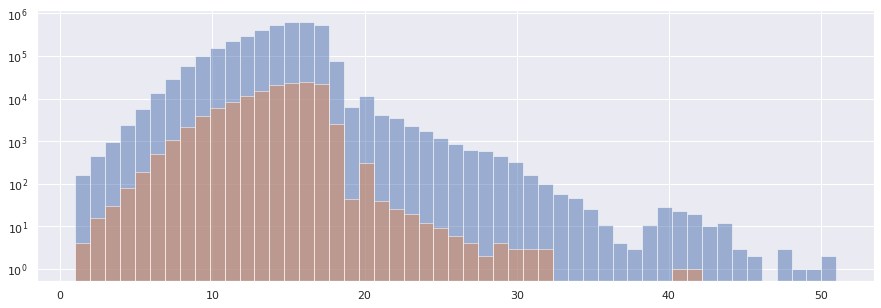

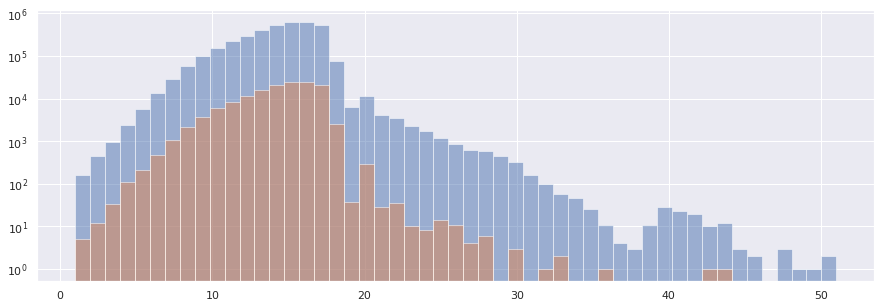

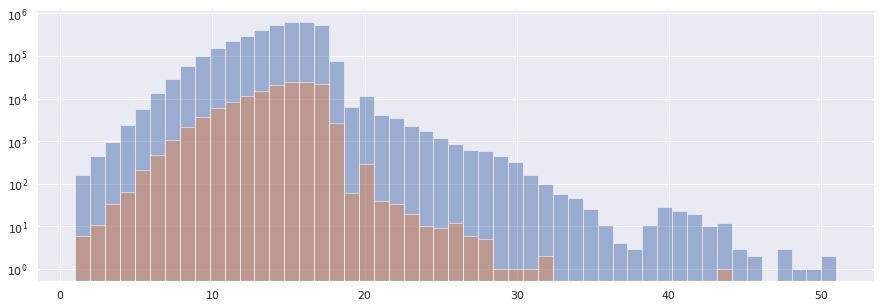

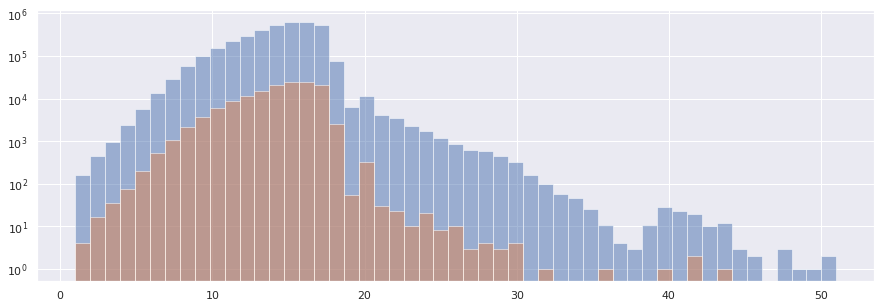

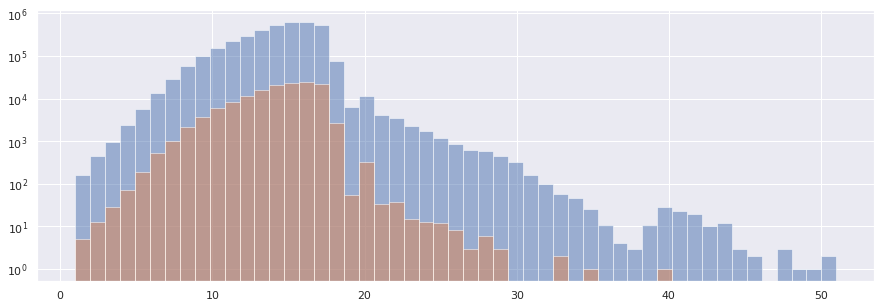

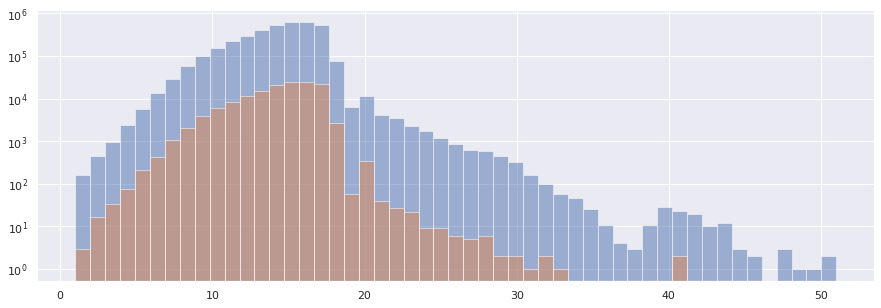

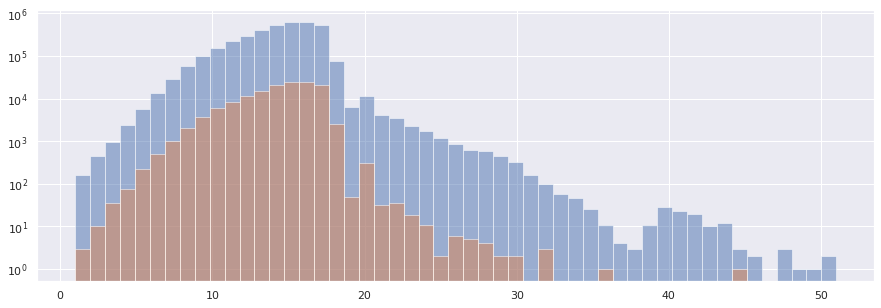

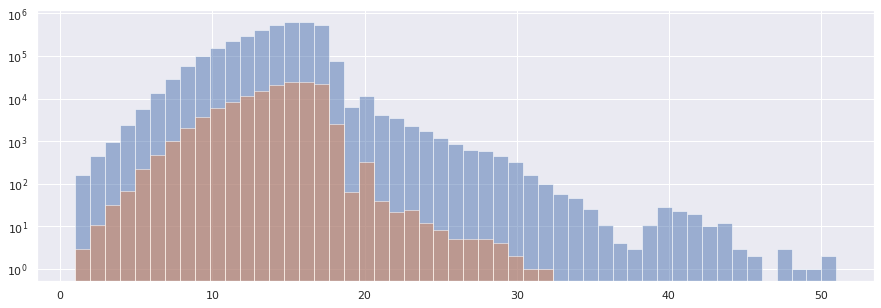

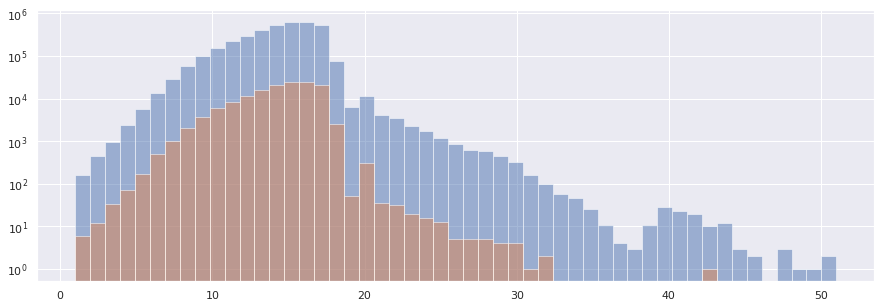

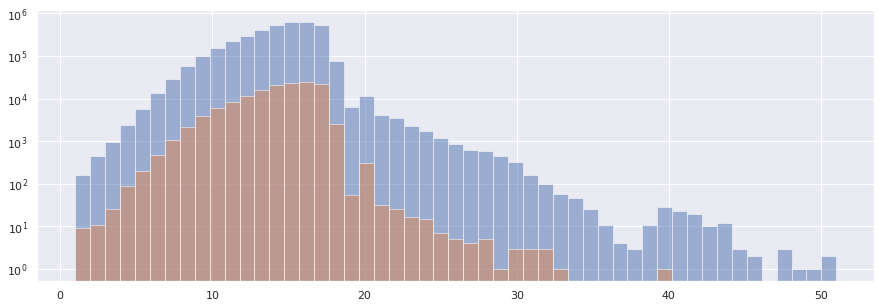

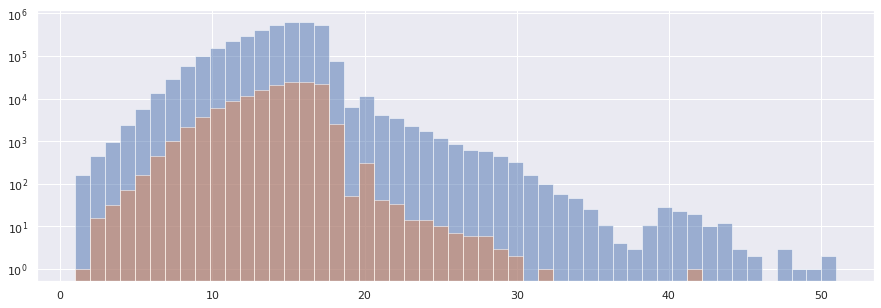

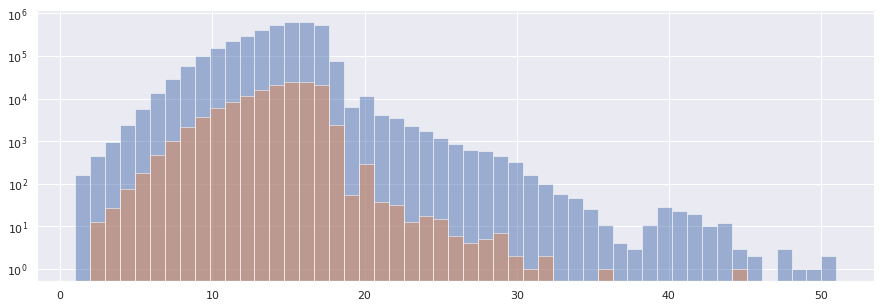

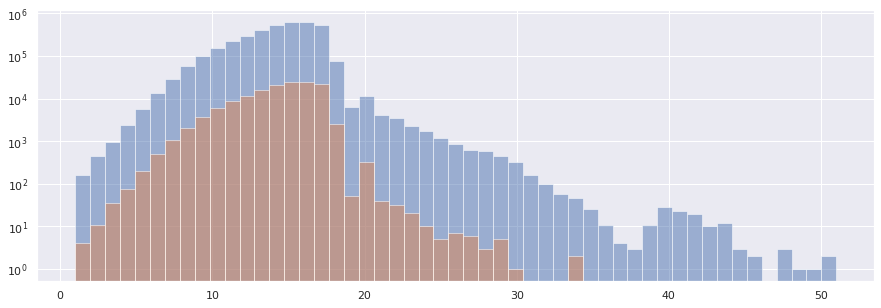

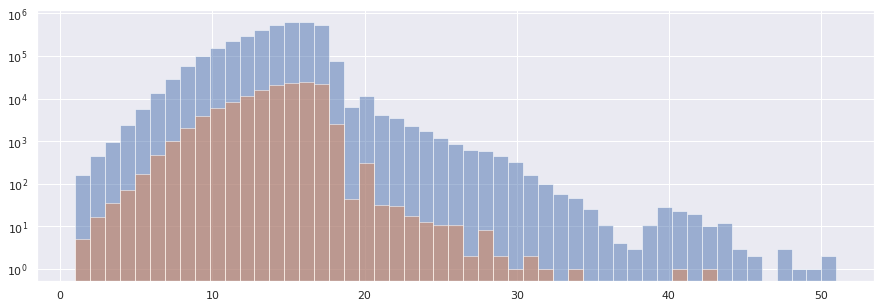

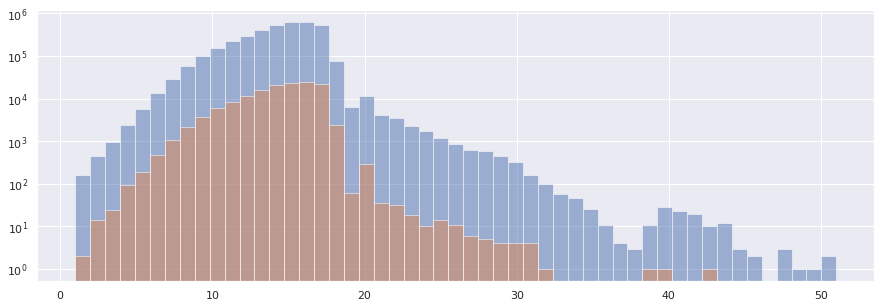

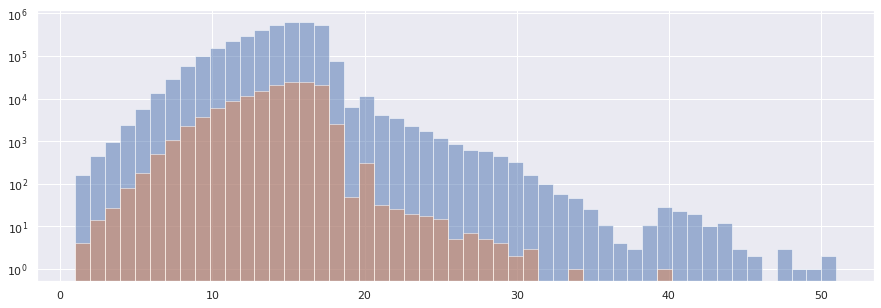

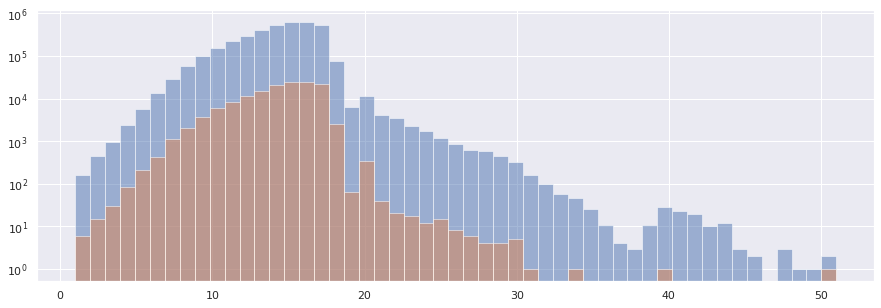

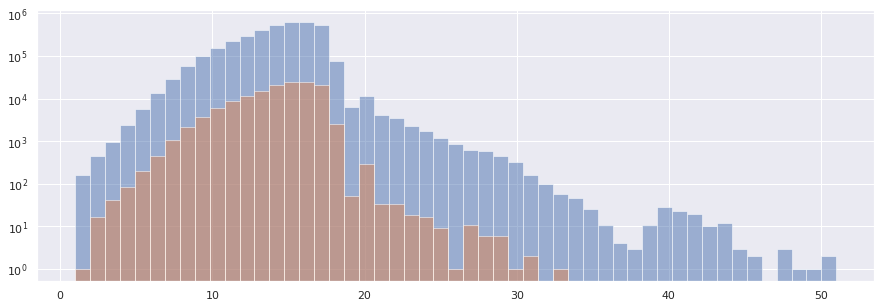

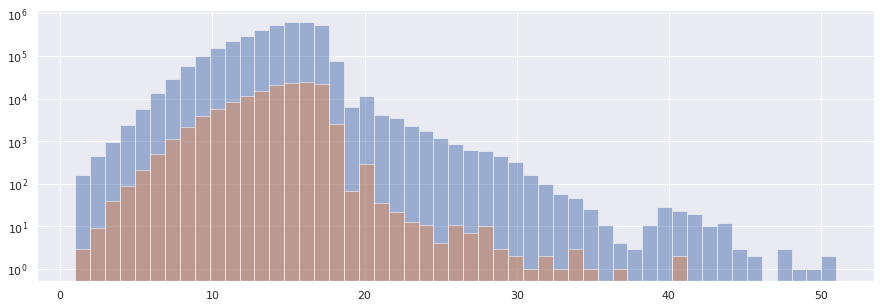

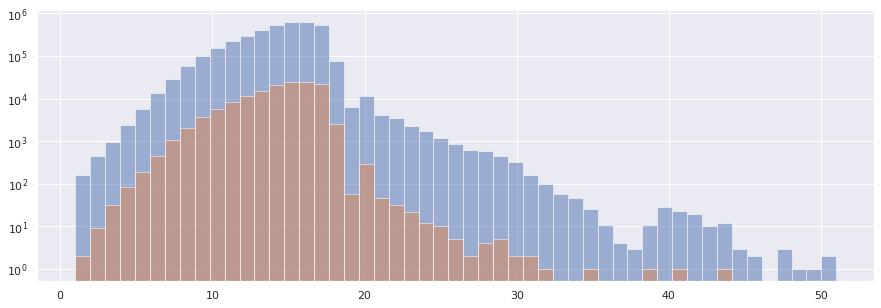

In [139]:
sns.set(rc={'figure.figsize':(15, 5)})
bins = np.linspace(1, 51, 52)
for train_idx, valid_idx in new_folds:
    _ = plt.hist(df['num_nodes'], bins=bins, log=True, alpha=0.5)
    _ = plt.hist(df.iloc[valid_idx]['num_nodes'], bins=bins, log=True, alpha=0.5)
    plt.show()

In [141]:
import torch
torch.save({'new_folds' : new_folds}, '../input/new_folds.pt')

In [163]:
new_split_dict = {}

In [164]:
for i, (train_idx, val_idx) in enumerate(new_folds):
    new_split_dict['train_%d' % i] = np.sort(train_idx)
    new_split_dict['valid_%d' % i] = np.sort(val_idx)
    if i==3:
        break

In [165]:
new_split_dict

{'train_0': array([      0,       2,       3, ..., 3746602, 3746611, 3746612]),
 'valid_0': array([      1,      21,      27, ..., 3746168, 3746343, 3746390]),
 'train_1': array([      0,       1,       2, ..., 3746601, 3746602, 3746611]),
 'valid_1': array([     10,      82,     125, ..., 3746476, 3746485, 3746612]),
 'train_2': array([      0,       1,       2, ..., 3746602, 3746611, 3746612]),
 'valid_2': array([      7,      14,      57, ..., 3746539, 3746561, 3746582]),
 'train_3': array([      0,       1,       2, ..., 3746602, 3746611, 3746612]),
 'valid_3': array([     65,      67,      88, ..., 3746334, 3746457, 3746508])}

In [166]:
torch.save(new_split_dict, '../input/new_split_dict.pt')

In [167]:
full_split_dict = {}
for i, (train_idx, val_idx) in enumerate(new_folds):
    full_split_dict['train_%d' % i] = np.sort(train_idx)
    full_split_dict['valid_%d' % i] = np.sort(val_idx)


In [169]:
torch.save(full_split_dict, '../data/full_split_dict.pt')

In [170]:
with open('../data/data.pkl', 'wb') as file:
    pkl.dump(res, file)